In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd

from collections import Counter

In [2]:
def Nhot_encoding(arr, l):
    """
    Nhotエンコーディングを行う

    Parameters
    ----------
    arr : ndarray
        ラベル
    l : int
        総ラベル数
    """
    ret = np.zeros(l,dtype='int')
    ret[arr] = 1
    return ret

In [3]:
#csvデータの呼び出し場所
loadpath = "../input/"
#csvデータの保存場所
savepath = "../output/"

### データ呼び出し

In [4]:
labels = pd.read_csv(loadpath + 'labels.csv')
sample = pd.read_csv(loadpath + 'sample_submission.csv')
train_df = pd.read_csv(loadpath + 'train.csv')

train_df["attribute_ids"] = train_df["attribute_ids"].apply(lambda x: np.array([int(s) for s in x.split(" ")]))
train_df["Nhot_Label"] = train_df["attribute_ids"].apply(lambda x: Nhot_encoding(x,1103))
train_df["id"] = train_df["id"].apply(lambda x: x + ".png")
train_df = train_df.set_index('id')

In [5]:
train_df

,attribute_ids,Nhot_Label
id,,
1000483014d91860.png,"[147, 616, 813]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1000fe2e667721fe.png,"[51, 616, 734, 813]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1001614cb89646ee.png,[776],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
10041eb49b297c08.png,"[51, 671, 698, 813, 1092]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
100501c227f8beea.png,"[13, 404, 492, 903, 1093]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
10050ed12fbad46d.png,"[189, 279, 774, 800, 1051]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
100543a032517972.png,"[188, 1034]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1006665c0aad488.png,"[1010, 1053]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1007057734dba6df.png,"[189, 541, 542, 993]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [6]:
train_df.iloc[0].attribute_ids

array([147, 616, 813])

In [7]:
for i in train_df.attribute_ids:
    print(i)

[147 616 813]
[ 51 616 734 813]
[776]
[  51  671  698  813 1092]
[  13  404  492  903 1093]
[ 189  279  774  800 1051]
[ 188 1034]
[1010 1053]
[189 541 542 993]
[  70  776  794  813 1046 1092]
[  79 1062]
[188 668 754]
[ 51 675]
[ 147  716  903 1092]
[ 161  489  704 1100]
[188 535]
[ 51 212 426 586 940]
[ 13 616]
[ 737 1009 1046]
[  25  161  784 1059]
[ 189  542  670  813  949 1092]
[ 147  189  418  742 1072 1092]
[ 194  480  483  485  813 1099]
[ 13 813 896]
[ 156 1084]
[103 180 573]
[ 147 1039]
[ 25 161 584 616 627 738 868]
[  51  212 1059]
[ 835 1059]
[  51  538  747  813 1012 1092]
[ 13 813]
[ 156  543  753  961 1072]
[ 13 552]
[  13 1013]
[ 156  228 1054]
[ 156  274  538  663 1059]
[ 51 339 492 961]
[ 13 501 670 871]
[ 13 857]
[194 616 844]
[ 13 668]
[121 464]
[189 439 733 813]
[615 813 896]
[156 466 616 739 813]
[ 147  616 1059 1092]
[121]
[  18   63  161  331 1062]
[131 420 477 671 768]
[ 51 733 813 952]
[  13 1056]
[501 548]
[ 13 978]
[ 114  217 1061]
[ 477  671  738 1059]
[304

[ 194  780 1034]
[  51  462  813 1020]
[ 13 698 745]
[ 335  595  813 1092]
[ 51 615 821]
[161 331 351 440]
[  79 1098]
[  29 1065]
[ 13 405 591 698 896]
[ 624  733  813 1019  369]
[ 13 716]
[489 780 369]
[  13  813 1039]
[ 194 1022 1046]
[737]
[335 671 768 780]
[189 813 903]
[ 189  583 1046 1064 1075 1093]
[266 439 746 881 993]
[ 45 519 545 580]
[ 156  274  671  698  813  954 1092]
[ 33 738 744 962]
[ 13 675]
[ 33 962]
[ 51 212 579 744 746 786]
[ 738  991 1030]
[519 734 813]
[ 99 517]
[ 280 1061]
[ 60 420 973]
[188 597 671 780]
[147 552]
[  72  903 1092]
[ 121 1059]
[359 498 813 896]
[292 541 811]
[ 45 434 548]
[121 962]
[494 501 549]
[ 29 637 813 876 921]
[121 420 724]
[726 369]
[  13 1092]
[627 813]
[1051  369]
[147 744 813 949]
[  13  405  896 1092]
[ 157 1034]
[ 304 1059]
[ 147 1059]
[675 754 369]
[189 663 678 864 953]
[263 420]
[ 95 161 584]
[ 79 539]
[ 189  903 1092]
[ 51 813 835 952]
[147 492 744]
[ 51 552 671]
[ 156  733  813  993 1092]
[ 13 420]
[ 111 1039]
[156 836]
[111 494 

[ 194  725  813 1099]
[ 156  570  592  813 1092]
[121 433]
[147 800 813 833 835]
[  79 1034]
[922]
[ 253  738 1034]
[ 51 532]
[ 13 462 516 696 733 993]
[ 13 552]
[813 896]
[ 133  189  420  753  838 1046 1072]
[194 483 494 737 954]
[ 25 161 492 758]
[194 482 483 498 835]
[156 628 780]
[194 494 738 830 923]
[147 780]
[162 597 639]
[  13  896 1092]
[147 517 615]
[ 51 603]
[ 188 1039]
[189 462 733 993]
[111 725 776 931]
[147 552]
[ 194  671 1034]
[ 23 702]
[156 247 896]
[ 69 420]
[ 13 668]
[111 586]
[ 335  682  835 1059]
[569 663]
[ 189  542 1072 1092]
[ 188 1099]
[ 51 212 554 612]
[ 13 519]
[116 161 487]
[ 13 445 457 813 896]
[156 786]
[ 194  404 1092 1099]
[ 189  477  737  813 1046]
[156 541 813]
[ 188 1059]
[189 639 950]
[  13 1066]
[434 369]
[ 194  813  898  993 1020]
[1092]
[239 809]
[125 634]
[  51  212  746 1045]
[ 650 1034  369]
[ 147  545  924 1046]
[147 650]
[ 189  559  691 1058]
[194 671 844]
[ 615 1099  369]
[  51 1013]
[147 813 988]
[786 835 369]
[ 79 639]
[ 29 383 540 584 813

[156 949]
[ 259  434  738  776 1046]
[ 113  744 1059]
[ 147  598  682  744 1092]
[ 121 1059]
[ 147  655 1092]
[179 586 813]
[  13  477  726  744  746 1020]
[ 29 418 544 737]
[1092]
[147 639 780 950]
[  85 1092]
[188 477 776]
[ 147 1092]
[ 13 445 457 811 813 896]
[663]
[189 732]
[ 13 552 780]
[ 121 1035]
[147 768]
[231 738 744]
[ 79 624 639]
[231 489]
[194 489]
[  51  734  813  901 1092]
[ 26 156 584]
[184 962]
[ 79 477 639]
[ 194  662 1092]
[345 598 738]
[  51  477  538  813 1092]
[  29  383  737  744 1059]
[ 896 1092]
[156 485 596]
[ 188  784 1099]
[147 418 542 738 948]
[ 13 626]
[189 325 936]
[  45  768  896 1092]
[ 541  542 1092]
[ 194  483  776 1074 1099]
[  79 1059]
[335 554 612]
[ 563 1061  369]
[189 477 485 603 671 780]
[ 45 734 813 983]
[121 713]
[188 558]
[  51  420  813 1046 1092]
[121 685]
[ 194  588  698 1092 1099]
[  13  896 1092]
[754]
[ 156  273  813  835 1046 1092]
[ 180  750 1099]
[ 194  733 1092]
[147 733 755 813]
[  79  813 1046 1081]
[147 744 813 896]
[  51  813  89

[ 29 436]
[ 147  542  597  827  971 1092]
[ 14 552]
[189 597]
[188 428 803]
[489]
[147 813 949]
[489 780]
[  13  870 1046]
[131 825 835]
[189 731 796]
[677 738]
[121]
[ 189  485 1047]
[ 147  542  813  949 1092]
[ 13 626 780]
[147 450]
[ 830  923 1046]
[121 505 653 764]
[ 13 477]
[ 222  335  420  698  988 1092]
[147 487]
[ 79 744]
[663]
[125 673 718 758 953]
[ 79 584 671]
[ 236 1061]
[552 671]
[ 147  418  559  813 1046]
[ 127  671  780 1066]
[156 813 896]
[ 79 477]
[121 304 597 650 718]
[ 51 858]
[541 554 581]
[147 675]
[  51  794  813 1092]
[111 506 745 780]
[608]
[ 226 1039]
[ 13 813 896]
[188 506 671]
[ 147  519  733  738  776 1046]
[156 485 639 768]
[ 13 813]
[  13  405  896 1092]
[147 477 709 858]
[ 188  428 1085]
[ 147  671 1035]
[  13  501  813 1092 1093]
[  13 1083]
[189 542 796 936]
[744 903]
[ 13 631]
[189 608 616 663 849]
[ 188 1099]
[ 99 503 809]
[ 494  813  923 1046]
[194 844]
[ 259  734  740  813 1092]
[ 304 1059]
[384 448]
[147 485]
[ 189  612  737  813 1092  369]
[952]
[

[676]
[ 13 552]
[ 335 1059]
[156 418 949]
[875 369]
[ 189 1084]
[231 813]
[332 688 888]
[813]
[ 13 519]
[  51   76  671 1030]
[ 194  671 1034]
[ 231  434  570  813 1092]
[ 308  813  903 1059]
[ 13 675]
[111 745]
[147 813 896]
[  79 1062]
[335 580]
[313 962]
[428 477 489 738 835]
[156 227 578 663 671 780 867]
[1039  369]
[259 612 671 780]
[ 188 1039]
[156 418 541 542]
[156 796]
[ 156  477  501  784 1046]
[147 283 551 650 835]
[147 626]
[ 734  813  830  886 1046]
[147 744 813 903]
[188 535]
[606 650]
[156 273 584]
[304 840]
[ 125 1059]
[ 79 813 993]
[ 671 1019  369]
[744 746]
[ 259  501  813  993 1092]
[ 335  616  738  834 1008]
[ 182 1059]
[  51  813  888 1092]
[ 194  454  671 1046 1059]
[813]
[  13  830 1046]
[737 776]
[ 282  639 1034]
[ 147  721  835 1084]
[335 579]
[138 477 612 369]
[ 189  798  813  985  993 1092]
[738 776]
[189 445 813]
[  51  813 1092]
[147 567]
[ 194  404  477  813 1092 1099]
[194 950]
[156 690 813]
[  51 1005]
[184 835]
[332 554 708 813]
[478 937]
[147 813 896]
[

[ 147  691  858  991 1058]
[663]
[156 916 949]
[813 989]
[189 859]
[  79  744 1024 1084]
[ 231 1039]
[813 949]
[156 485 603]
[133 189 796]
[ 259  541  579  813 1092]
[304 813]
[ 335  813 1039]
[ 13 865]
[  79  695 1059]
[ 133  189  541  595  753  773 1072]
[ 78 487 718]
[156 402 434 485]
[ 79 671]
[147 541]
[ 189  931 1032]
[ 147  405 1092]
[188 747 803 813]
[111 586 746]
[ 147  672  834 1092]
[840]
[ 304 1010]
[ 79 420 477 487]
[774 369]
[492]
[ 13 552]
[ 179  420 1059]
[1034]
[194 716]
[121 536 724]
[ 51 597]
[ 147  586 1039]
[716 369]
[126 161 633 885 996]
[ 51 804]
[ 194  480  494  580  923 1046]
[205 465 650]
[202 489]
[ 194 1092]
[ 147  776 1046]
[ 519  733  813 1046]
[189 420 449]
[774]
[  25  161  993 1038 1059 1092]
[ 189  742  813 1062]
[147 502]
[ 188  886 1034]
[188 518]
[489 972]
[194 584 737]
[304 980]
[156 227 612 671 780]
[180 637 703 791]
[ 29 744 780 813 896]
[  13  405  896 1092]
[ 156  418  796  813 1092]
[ 156  731  742  813 1092]
[189 813 903]
[ 114  217 1061]
[30

[434]
[ 70 520]
[127 700]
[147 382 597 671]
[813 369]
[768 369]
[188 597 852]
[ 13 978]
[813 896]
[  13  626 1013]
[ 192  385  420 1059]
[448]
[147 626 671]
[  13  405  896 1092]
[ 737 1046]
[189 597]
[ 51 626]
[189 738]
[ 51 718 813 896 961]
[194 794 992]
[ 147  283  744  896 1092]
[ 194  485  734  813 1099]
[ 51 212 762]
[597]
[ 188  428 1059]
[ 194  672  701  813 1046 1099]
[188 774]
[161 574]
[111 573]
[ 121 1059]
[ 79 498]
[  25  161  813  968 1062 1092]
[  79 1097 1099]
[147 780 833 835]
[ 79 597 624]
[304 813 896]
[161 477 872]
[ 79 612 671 830]
[156 418 541 543 699]
[ 813 1059]
[  29  383  535  738  744  888 1059]
[ 45 650 784]
[1039]
[156 434]
[ 189 1034 1101]
[ 304 1039]
[  51  339  612  627  813 1092]
[156 552]
[ 121 1034]
[ 111  671  780 1059]
[552 369]
[ 194  671  780 1059]
[ 13 780]
[147 580]
[313 420 962]
[ 51 718 813]
[304 433 671 705 780]
[156 406 645]
[ 125  634 1051]
[ 194  744  776 1091]
[ 194  477  483  494  738 1046]
[189 813]
[  51  339  671 1059 1092]
[ 189  744

[156 744 813 903]
[ 70 580 813 835]
[304 465 744]
[147 813 903]
[ 156  538  595 1092]
[833 369]
[121 872]
[194 487 671]
[304 489]
[ 147  513 1092]
[ 194  624 1059]
[ 188  477  526  664  860 1099]
[ 189  306  521  813 1025 1092]
[ 519  737  776  924 1046]
[253 552]
[ 111  813 1092]
[ 259  541  543  813 1012]
[147 716]
[194 612 624 671]
[ 13 925]
[335 420]
[239 420 754]
[418 542 620 796 949]
[ 79 624 754]
[ 194 1034]
[ 51 477 552]
[ 51 212 554 762]
[  51  671  780 1066]
[ 13 663]
[  79  737  776 1046]
[194 671 821]
[754]
[ 51 212 780 813 821]
[147 517 559]
[189 800]
[ 79 490]
[ 79 539 776 830]
[194 477 671 744]
[ 156  399 1092]
[  79 1062]
[813 896]
[1039  369]
[  51   76  506  612  780 1017]
[ 127  650 1059]
[ 147  744  903 1092]
[ 127 1059]
[ 13 927]
[ 51 434]
[ 121 1034]
[188 535]
[  13  405  896 1092]
[ 189  671  780 1034]
[1034  369]
[ 13 738]
[ 189  484  813 1039]
[ 147  570  793  813  908 1092]
[121 955]
[121 464]
[483 975]
[ 23 546 597 972]
[182 482 498]
[  79  874 1059]
[188 487

[ 13 552 780]
[ 51 725 771 776]
[ 194  489 1099]
[147 400]
[147 639 671 780 950]
[ 25 161 534 734 751 813]
[ 595  654  813  932 1092]
[147 597]
[147 809]
[ 51 552]
[ 313  813  903  962 1099]
[ 194 1059]
[259 580 980]
[  51  532  615  747  835 1018]
[194 489]
[  51  813 1092 1093]
[ 147  597  671  780 1034]
[ 194 1092]
[ 99 161 538 813 871]
[1020]
[ 896 1092]
[156 554 584 813 896]
[194 813 822 844]
[ 51 553 830 886]
[ 258 1073]
[188 489]
[ 189  733  813  971 1046 1092]
[  51  671  780 1034]
[156 733 738 997]
[ 13 813 896]
[1061]
[ 194  566 1099]
[553 986]
[ 147  283  671  685  746  896 1092]
[ 121 1039]
[ 13 480 494 913]
[ 13 633 746]
[ 259  501  616  813 1020 1059]
[147 450]
[392 436]
[ 744 1061  369]
[121 653 920]
[ 272  427  663 1046]
[ 13 519]
[ 189  378 1059]
[ 156  462  516  670  993 1084]
[ 501  813 1046]
[189 430 931]
[147 809]
[189 618 678 709 835 842]
[  14 1066]
[ 147 1007]
[188 489]
[  79  733  813 1092]
[258 754]
[304 489]
[434]
[  55  131  477  538  813 1092]
[ 43  51 726]

[  79  538  813  960 1092]
[304 774]
[ 194 1039]
[671 950]
[  79 1059]
[ 927 1019  369]
[121 433 738]
[  51  519  737  813 1046 1092]
[ 194  461 1034]
[552 639]
[ 280 1061 1092]
[182 498]
[ 280  784 1059]
[ 13 552]
[ 776 1046]
[147 283 554 612]
[ 483  676 1046]
[631]
[ 189  783 1099]
[  51  597 1059]
[189 485 780]
[194 404 738]
[189 786]
[182 922]
[  61  161  331  809 1059]
[541]
[ 285  634 1062]
[563 566 369]
[121 671 872]
[  13  405  896 1092]
[ 13 626]
[ 733  813 1092  369]
[121 493]
[  51  212 1059]
[ 259  551  813 1093]
[189 768]
[489 369]
[ 194  453  813 1046 1059]
[147 621 671 682 691]
[ 189 1034]
[335 813]
[189 485 671]
[ 13 552]
[ 147  655  671  737  776 1046]
[347 813 903]
[671 369]
[ 194 1034]
[147 595 744 813 903]
[418 542 579 949]
[  45  670  734  863  993 1084]
[ 156 1064 1092]
[754 369]
[ 501  559  738 1046]
[125 813 961]
[ 189  621  747  813 1092]
[490]
[189 849 975]
[138 612 671 369]
[ 13 552 671]
[147 768]
[ 35 962]
[  13  813 1020]
[ 194  738  830  924 1046]
[156 326

[ 195 1059 1084]
[147 813 949]
[ 194  480  813 1046 1059]
[ 51 212 867 961]
[156 554 813 835]
[ 55 477 671 768 780 369]
[ 13 813 896]
[189 477 768]
[813 896]
[147 749]
[  79  420  671  780 1059]
[ 23 893]
[1061]
[ 99 813]
[ 127  507 1092]
[ 83 681 872]
[  25  161  734 1059]
[ 275  582 1023]
[147 639 671 780 950]
[  89  668  975 1059]
[156 485 607]
[189 509]
[180 497 498]
[188 420 488 733 739 813]
[  79  671  780 1062]
[ 189 1071]
[147 568 813]
[147 477 538]
[  13  813 1046]
[194 420 538 813 844]
[ 13 626]
[ 185  607  864 1058]
[ 131  633  761 1084]
[195 833]
[  51  737  738 1046]
[ 189  485  607 1101]
[147 813]
[121 492 784]
[  13  744 1092]
[552]
[1039]
[147 520 835]
[ 99 634]
[ 156  639 1035]
[ 147  283  671  780 1059]
[1039]
[147 552]
[  79 1059]
[ 99 813]
[ 70 477 616 733 784 800]
[  16  156  568  813 1059 1092]
[  51  206 1059]
[138 465 671 369]
[ 189  494  501 1032]
[  13  405  896 1092]
[ 637  738  769  921 1046]
[1034  369]
[335 813 949]
[231 671 780 907]
[ 13 626]
[ 13 716]
[1

[156 483 645 668]
[ 240  420 1053]
[ 180  477  728  813 1046 1099]
[121 681]
[ 147  926 1059]
[ 127  655  678  813 1046 1092]
[ 147 1050]
[147 543 796 949]
[154 348 671 780 889]
[147 738 821]
[ 51 212 586 962]
[ 121 1059]
[  33  582 1023]
[ 51 517 559 603]
[ 163  511  534  734 1092]
[147 978]
[ 194  404  446  813 1020 1046]
[619 692 825]
[ 99 546 695 758]
[ 188 1039]
[156 784 813]
[518]
[835]
[771 776]
[ 156  273  584  734  813  835 1084]
[ 194 1092 1099]
[ 99 663]
[161 858]
[111 813]
[147 738]
[ 51 579 776 924]
[ 259  423  444  835  870 1100]
[121 505 962]
[ 13 626]
[ 25 161 758 813]
[ 45 554 584]
[189 949 971]
[147 783]
[189 953]
[498 600 813]
[189 545 559 784 871]
[ 194  570  794 1046 1077]
[ 189  730  757 1020]
[275 685 784]
[684]
[121 724 961]
[ 194  737 1001 1046 1059]
[ 231  605  660  698  813 1092]
[487]
[147 813]
[147 434 545]
[189 501 744 804 963 975]
[188 477]
[359 498]
[ 156  173  477  671  780 1062]
[ 147  780 1034]
[ 194  404  813 1092]
[  13  405  896 1092]
[ 14 552 671]

[  79  671 1046 1092 1099]
[ 121 1039]
[  70  776 1046]
[ 79 477 487]
[184 493]
[ 813  913 1043 1092]
[189 583 597 708]
[ 275  582 1023]
[194 537 927]
[259 488 538]
[321 335 597]
[ 13 800]
[147 612 668 671]
[ 259  418  593 1095]
[ 189  776  830 1046]
[ 51 597]
[121 684 724]
[ 13 552]
[147 283 705 780 783 953]
[496 369]
[194 420 844 972]
[ 335  813  901  993 1012]
[161 503 962]
[ 147  813  975 1006]
[ 332  543  940 1072]
[ 189  430  559  738  810 1084]
[147 283 705 742 953]
[189 378 768]
[121 922]
[161 800]
[156 552 639 813]
[147 477 744 822]
[ 147  520  835 1050]
[ 194 1034]
[ 189 1034]
[ 79 612]
[ 79 489 671]
[ 188 1035]
[121 415]
[121 432 724]
[ 147  568  671 1092]
[ 13 477]
[111 744 813 896]
[194 464]
[  51  480  620  813 1040 1092]
[436 369]
[147 744 813 896]
[ 619  828 1046]
[189 485 943]
[ 184 1039]
[ 189 1059]
[ 13 477 776]
[ 35 962]
[ 194  485  813  890 1092 1099]
[147 597 738]
[ 51 628]
[ 147  322  835 1062]
[ 51 519 616 733 813 952]
[  79 1062]
[156 833 859]
[ 194  823  826 1

[ 51 596]
[ 111  425 1046]
[  70  771  813 1046]
[ 79 489]
[188 434 597]
[ 813 1072 1092]
[ 259  655  896 1092]
[  51  725  813  866  952 1092]
[ 79 450 461 668 782]
[147 783 813]
[ 189  606  896 1092]
[ 156  173  663  961 1092]
[  78  788 1059]
[ 121 1084]
[ 276 1059]
[111 480 483 676 738]
[  35 1037]
[ 70 483 608]
[ 79 487]
[ 79 638]
[121 840]
[713 753]
[156 418 543 753]
[194 612]
[ 335  671  780 1058 1065]
[  79  538  654  737  813 1046]
[ 99 705]
[ 147  606 1046 1092]
[ 13 818]
[ 265  813  903 1092]
[131 835 920]
[188 489]
[ 51 212 477 671 714 764]
[111 737 950]
[189 813 896]
[ 23 436]
[ 188  671 1059]
[156 538 541 579 813 835]
[188 597 671 780]
[ 42 156 612 671]
[180 533]
[ 194  477  553  923 1046 1059]
[121 433]
[121 557]
[ 231 1039]
[147 671 768]
[127 434 907]
[ 13 552]
[189 252 477]
[390 487 650]
[332 420 949]
[548 737 738]
[ 13 698]
[ 51 596]
[477 922]
[304 529 774]
[ 335  784  813  835 1092 1095]
[  51  346  780  929 1035]
[ 354 1059]
[ 79 454 489 671]
[156 580 764]
[156 173 

[  51  813  952 1092]
[145 738 903]
[147 558]
[121 813]
[  99  425  718 1096]
[  51  434  734  813 1092 1093]
[ 13 519]
[615 813 896]
[ 188 1059]
[  26  156  584  742  813 1092]
[813 903]
[191 597]
[ 147  501  621 1089]
[194 404 744 813]
[813 996]
[  13  813  975 1092]
[ 154  348  813  889 1092]
[ 194  927 1006]
[ 70 413]
[304 487]
[ 304 1059]
[ 51 532]
[489 369]
[  13  738  866 1046]
[489 501 369]
[135 554 612 369]
[285 464]
[  79  671 1059]
[147 583 929]
[121 724 962]
[ 147  718  903 1092]
[734 764 813 369]
[813 896]
[ 308  338  821  896 1092]
[ 542  813  949 1072]
[270 479]
[156 501 519 734 738]
[ 13 813 896 903]
[335 709 835 858]
[ 127  171  428  436 1020  369]
[147 626 639]
[189 813 903]
[931]
[147 551 682]
[ 189 1092]
[612]
[133 189 706]
[202 450 576 639]
[415]
[  51  718  903 1092]
[929]
[ 194 1059]
[194 592 698 744]
[156 227 451 701 813]
[121 962]
[ 51 663 706 835]
[  13  756  813  916 1092]
[ 111  501  619  835  931 1046]
[ 189  434  559  813 1046 1092]
[1019  369]
[ 189  671 

[135 554 612 671 369]
[949]
[121 724 955]
[ 180  750 1099]
[ 79 671 925]
[  51  616  733  813 1092]
[335 718 813]
[ 189  418  541  542  742 1092]
[485 492 698 916]
[  70  579 1021]
[147 811 835]
[ 766 1039 1059  369]
[205 420 477 487 494]
[  25  161  420  738 1059]
[ 483 1040 1046]
[  51  813  898 1020]
[354 754]
[  51  339  737 1030 1046]
[189 796 940 949]
[  79 1024]
[ 147  813  876  995 1092]
[ 718 1072]
[194 487]
[ 13 437 733 813]
[188 612 671 780]
[189 768]
[ 13 615 744]
[604]
[258 498]
[194 487 671]
[ 13 813 896]
[684]
[1059  369]
[236 464]
[ 147  671  780 1034]
[ 147  742  829 1046]
[433 718]
[  99  420  962 1015]
[ 147  655  813  896 1092]
[188 568]
[ 180  750  813 1099]
[147 661 716]
[189 813 949]
[188 518]
[ 147 1046]
[ 194 1092]
[ 147  501  776 1046]
[335 503 733 813]
[304 637]
[672 738 369]
[ 51 400 671]
[  13 1056]
[ 147  492  671 1059 1092]
[ 13 554 670]
[ 194 1046 1092]
[ 259  776  830  923  924 1046]
[ 194 1034]
[147 420 434]
[ 194  600 1062]
[1099  369]
[ 316 1046 1081

[498 592 718 813 369]
[415]
[  99  718  915 1100]
[  51  764 1020 1092]
[  51  430  434  621 1089]
[188 652 690 734 803 813 833 834 916]
[259 543 753 813]
[ 147  738 1046]
[189 378 465]
[161 404 813]
[ 189 1034]
[ 821  896 1092]
[ 483  830 1046]
[ 33 824]
[  13  501  742  813 1092 1093]
[493 369]
[ 483  548  776 1046]
[194 489]
[ 189  813  833 1059 1077 1092]
[  13  405  896 1092]
[304 584]
[ 189 1034]
[335 450]
[ 51 404 813 969]
[ 147  813  835 1093]
[188 612 671 705]
[304 349 487]
[591 655 698]
[581 823 939]
[ 304 1039]
[156 273 720]
[726 813 369]
[580 813]
[  51  477  671 1035 1046]
[ 189  744 1092 1096]
[ 189  378  671  780 1034]
[  51  480  483  813 1092]
[188 433 744]
[ 188  671  780 1034]
[ 147  541  731  942 1072]
[161 584]
[ 13 626 671]
[156 796]
[147 809]
[  79  464 1024]
[813]
[  51  536 1007]
[ 156 1092]
[ 51 714 879]
[ 127 1039]
[ 79 885]
[304 349 487]
[649]
[ 51 744]
[189 800]
[ 259  541  641  813  932 1072]
[ 147  459 1064]
[147 520]
[ 133  189  903 1092]
[189 492 699 81

[304 884]
[354 742 829 961]
[ 147  671  780 1034]
[ 188 1034]
[189 552 671 870]
[1092 1099  369]
[304 423]
[194 498 499 844]
[184 493]
[ 147  671  780 1035]
[121 415 704]
[189 401 709 813 858]
[259 586]
[194 738]
[833]
[189 676 738]
[ 51 813]
[1099  369]
[304 592 797]
[ 153  304  813 1061]
[147 283 436]
[304 529 774]
[  13  405  896 1092]
[156 624 733 938]
[ 61 161 331 487]
[ 13 519]
[121 464 715]
[189 485 663 835]
[ 156 1039]
[ 189  583  807 1046 1064]
[ 147  650  813 1062 1092]
[ 121 1039]
[1034  369]
[147 483 737 738]
[427 485 698 896]
[ 202 1061]
[510 369]
[ 51 490]
[684 724]
[538]
[956]
[121 724 955]
[194 487]
[ 189  616  776  813 1046]
[ 13 670 813 839]
[259 477 480 663 800]
[147 462 733 813]
[ 189  485 1069]
[189 436]
[121 432 724]
[ 189  718  734  744 1062]
[754 369]
[ 332  906  993 1012]
[541 581 623 704]
[  51  212  336  671  780 1034]
[584 369]
[  51  485  714  813 1092]
[147 813]
[ 13 445 457 813 896]
[ 189 1059]
[ 194  813  896 1099]
[ 51 212 489]
[ 156  813  924 1046]
[ 1

[135 489 813 833 834 369]
[ 194  506  886 1098]
[ 121 1035]
[ 147  418  422 1072]
[147 756 813 914]
[ 51 501 616 650 738]
[ 121 1059]
[194 780]
[ 13 813 896]
[ 13 554 670]
[194 498 791]
[ 79 493]
[188 612]
[ 147  420  744 1092]
[188 487]
[  13  583  813  887  965 1092]
[ 13 682 698]
[ 13 568]
[ 23 718 961]
[  51 1059]
[269 552]
[ 51 393 477 612 671]
[ 79 497 498]
[ 111  570  813  982 1071 1092]
[182 726]
[121 578 809]
[189 413 521]
[ 147  780 1034]
[189 671 768]
[ 194  738 1034]
[ 147 1062]
[308 568]
[  51  663  785  813 1092]
[ 259  691  813  835  896 1099]
[121 433 718 903]
[121 718 813]
[ 121  961 1092]
[156 189 580 591 592 654 995]
[872]
[147 342 540 612 745 813]
[313 597 671 695]
[  79 1034]
[109 156 541 543 823]
[ 304  656  800 1061]
[147 554 612]
[ 13 813 896]
[ 14 978]
[ 51 558 903 910]
[191 597]
[ 813 1034  369]
[ 147  914  931  964 1006]
[147 420 448 664 704 813]
[ 287  835 1034]
[1084  369]
[111 420 477 813 835]
[ 189  794  813 1092]
[ 164 1039]
[282 487]
[  44  161 1059]
[1

[313 420 962]
[ 13 813]
[993]
[334 418]
[  51  813 1092]
[ 259  420  737  738  924 1068]
[541 738]
[304 584]
[ 189  559 1092]
[194 487 737]
[ 70 427 671 780]
[189 937 949]
[189 738 835]
[121 432 744]
[ 13 626]
[111 665]
[ 147  756  813 1092]
[  51  598  679  744 1000]
[ 51 434 650]
[131 768]
[147 813]
[615 813 896]
[ 51 626 671]
[188 612]
[  51  744  813 1092]
[ 79 744]
[ 13 813]
[147 833]
[496 369]
[ 189  477  479  835 1092]
[ 79 489]
[147 813 896]
[483 494]
[111 477 506 835 993]
[ 121 1059]
[ 79 558]
[1039]
[1059]
[189 426 542]
[189 603]
[ 418  796  813  949 1092]
[ 194  420  780 1059]
[156 541 579 581]
[304 477 821]
[ 316  621 1089]
[ 13 716]
[121 961]
[147 283 477 639 691 732 761 792]
[485 746]
[  51  615 1039]
[ 51 675]
[ 194 1092]
[121 433]
[ 147  813 1092]
[ 51 626]
[ 51 339 489 975]
[ 13 552]
[ 79 487 671]
[  13  738 1033]
[294 477]
[147 501 810]
[121 505 961]
[  51 1059]
[ 13 626]
[ 236 1061]
[147 552 671 780]
[ 147  813 1039]
[  79 1059]
[147 492]
[304 349 487]
[ 231 1039]
[ 

[ 51 733 813]
[188 490]
[ 813  896 1039]
[194 489]
[ 147  671  780 1059]
[ 13 552 671]
[671 369]
[125 584]
[194 784 844]
[ 58 624 744 813 949]
[  51  501  813  923 1046 1092]
[189 519 545 548 734]
[ 189  616  707  744  813 1092]
[147 696 744 896]
[121 724 955]
[ 189  418  541  543 1072]
[433 744 369]
[  79  668  738  776  830 1059]
[189 542 796]
[  79 1062]
[194 584 738]
[  12  147  420  737  813 1092]
[ 99 733 738]
[ 194  494  738  830 1046]
[  79  813 1046 1092 1097]
[  13  405  896 1092]
[ 156  813  833 1084 1092]
[1068]
[  79  494  737  775  923 1046]
[ 194 1034]
[ 13 626 671 780]
[ 13 567]
[ 98 758]
[194 737 776 830]
[ 51 671 780 804 950]
[127 922]
[ 231  813 1012]
[ 131  434  813 1092]
[147 434 738 931 961]
[ 79 631]
[147 978]
[259 501 813 961]
[127 176 489]
[121 718 813]
[482 498]
[ 147  554  896 1092]
[1099  369]
[744]
[147 655 738]
[147 615 636 864]
[  51  616  779  813  835 1092]
[ 13 552]
[ 51 418 738]
[188 489]
[121 432 724]
[121 436]
[194 899]
[1059]
[ 253 1059]
[156 529 7

[147 738]
[651 747]
[189 399 462 733 993]
[335 949]
[121 955]
[718 972]
[961 369]
[  51  671  813 1092]
[189 378 597 734 842 972]
[ 13 661 813 896]
[  51  813 1020]
[147 430 468]
[ 25 161 489 691 780]
[478 896]
[ 13 620 813 888]
[ 156  753  895  949 1099]
[188 477 487]
[133 189 418 718]
[ 87 754]
[ 45 520 744 813]
[  13  737  738 1009]
[ 46 189 520]
[147 622 744 813 896]
[189 378 774]
[ 79 489]
[ 13 555 780]
[189 833]
[ 121 1059]
[239 487 835]
[147 747 813 988]
[ 896 1092]
[147 400]
[147 732]
[ 194  519  580  733  975 1099]
[ 23 487]
[ 189  813  974  991 1092]
[189 529]
[194 489]
[ 189  784 1034]
[147 485 554]
[  51  610  616  627  813 1092]
[156 477 639 671 744 950]
[156 227 477 961]
[ 79 811]
[  44  161  961 1092]
[ 194  813 1046 1092]
[ 194  716 1099]
[259 543 616 733 947 993]
[156 436 720]
[ 51 212 586]
[ 23 597 671]
[ 113  420 1059]
[430]
[ 121  813 1093]
[1019  369]
[ 189  733  993 1084]
[ 194 1059]
[304 584]
[ 147  477 1059]
[127 552]
[  51  393  671 1045]
[189 511 718 813 915 9

[189 480 613 813]
[  13  405  591  903 1092]
[ 835 1034  369]
[121 724 955]
[813 888]
[420]
[ 111  738 1089]
[ 147  813  952 1043 1092]
[ 194  671 1027]
[ 13 555]
[580 734]
[ 147  501 1092]
[ 156  434  813  886 1092]
[ 259  506  663  682  835 1062]
[ 49 189 554 720]
[ 51 393 671 758]
[ 259  480  668  813 1092]
[ 189  430  559  738  747 1001]
[  70 1089]
[ 194 1034]
[ 13 420]
[  51  744  813  947 1092]
[ 156  733 1059]
[ 51 768]
[  13  405  896 1092]
[ 189  378  554 1059]
[ 655 1083]
[ 79 612]
[127 552]
[189 434 615]
[ 79 489]
[  13  405  896 1092]
[ 189  707 1046]
[ 194  813 1062]
[813 896]
[ 147  410  418  971  973 1072]
[  79  671 1062]
[ 13 480 483 738]
[ 58 558 744 896]
[259 971]
[147 813 896]
[542 553 796 949]
[189 538 659 813]
[188 434]
[ 194  679 1059]
[489 369]
[ 259  737 1068]
[ 14 567]
[  90  102 1030]
[ 13 755 813]
[817 975 993]
[384 629]
[813 896 903]
[ 194 1059 1092]
[ 813 1033]
[1019  369]
[121 638 703 821]
[ 13 813 896]
[161 642 872]
[555 671 369]
[ 131  480  483  738 10

[833]
[188 612]
[ 99 813 833]
[ 194 1092 1099]
[111 680 824]
[  79 1059]
[331 579 633 772 784]
[147 454 780]
[318 552 862]
[ 147  711 1039 1092]
[ 79 624]
[ 147  671  780 1034]
[147 458 647]
[ 320  582 1023]
[147 639 671 780 950]
[ 127 1059]
[ 304  718 1059]
[147 858]
[  51  621 1092]
[ 13 501 559 871]
[ 51 519 734 813]
[ 194  813 1059]
[ 127 1059]
[ 51 744 813 903]
[127 552]
[335 780]
[ 13 716]
[ 194 1034]
[ 79 420 482 498 802]
[  79 1062]
[ 194  747  813  975 1092]
[156 595 742 985]
[121 433]
[438 671 369]
[ 538 1046]
[ 188  615  779 1099]
[189 304 489]
[ 51 501 738 924]
[ 121  415 1026]
[373 597]
[  79 1099]
[ 563 1061  369]
[ 79 712]
[813 896]
[  13  896 1092]
[ 189  485  671  813 1092 1101]
[  13  405  903 1092]
[ 189  375  612  993 1033]
[147 434]
[189 833]
[  51  580  670  995 1084]
[768 780]
[ 598 1092  369]
[147 734]
[121 962]
[121 477]
[  79  671 1034]
[ 147  538  908 1059 1092]
[ 180  764  803 1099]
[786 369]
[ 13 963 964]
[480 483 501]
[156 733 813 898 899 991]
[ 156  227 1

[813 896]
[1019  369]
[1062  369]
[  13  405  896 1092]
[282 489 695]
[813 369]
[189 485 682 780]
[1046]
[304 744 813 903]
[ 156  813 1046]
[189 768]
[ 189  434 1007]
[ 733  734  738 1019  369]
[156 436]
[  33  582 1023]
[147 626]
[188 464 507]
[  51  813 1092]
[  70  923 1041]
[226 578 833]
[189 378 821]
[ 147  666  903 1092]
[147 612 650 671]
[ 13 552]
[  79 1039]
[ 246  813 1004]
[121 432 505 724]
[ 180  404  663 1046 1092]
[483 494 501 522 619]
[ 194 1034]
[ 335  596 1034]
[ 33 420 962]
[ 223 1020]
[  79 1059]
[  13  405  896 1092]
[147 732]
[189 420 485]
[147 737]
[ 13 881]
[180 728 767]
[  29  671 1059]
[147 744 813 835 903]
[  51  467  813  952 1092]
[  61  161  331  584  663 1092]
[ 79 890]
[  13  733 1092]
[ 51 626]
[304 774]
[ 475 1059 1092]
[425 953 369]
[161 204 813 994]
[ 51 616 698 744]
[ 51 339 477 612]
[ 348  397  671 1030]
[133 189 796]
[189 744 813 903]
[ 121 1098 1099]
[359 634]
[189 378 768]
[  13  480  501  512  813 1092]
[ 51 477 671 821]
[194 477 826 846]
[461 47

[  51  670  813 1085 1092]
[790 813 903 369]
[  51  800  991 1092]
[147 612 671 745 780]
[612 864 369]
[ 29 465 746]
[ 111  776  923 1046]
[259 480 483 737 776]
[121 738 968]
[ 194 1034]
[ 51 597 835]
[ 13 552 780]
[ 147  552  598  671  738 1046]
[ 26 156 720]
[ 13 813 903]
[ 13 626]
[155 189 768]
[703]
[1059]
[1039]
[101 833]
[1020  369]
[ 51 636 671 858]
[ 184 1092]
[180 497 498]
[ 147  813  896  903 1092]
[ 202  813 1046]
[147 624 754 835]
[ 79 465]
[922]
[ 13 552]
[ 147  718  729 1092]
[597 369]
[ 111  420  603  726 1092]
[ 51 212 556 671 746]
[ 576  584  780 1046]
[ 188 1034]
[ 259  521  541  554  565 1038]
[194 844]
[194 822 844]
[  13  405  896 1092]
[ 13 548 670 737 923]
[ 147 1034]
[335 477]
[542 796]
[304 487 546]
[ 156  227  477  480  813 1059 1092]
[133 189 477 508 598 739 813]
[121 432 724]
[121 432 724]
[335 738]
[156 813 949]
[ 477  780 1099]
[147 542 579 813 939]
[239 754 860]
[ 822 1019  369]
[ 194  477 1055 1059]
[ 194  813  890  992 1046 1099]
[ 70 776]
[ 194 1034]
[

[ 13 830]
[ 259  737  776  813  923 1046]
[194 438]
[ 13 501]
[ 194  694 1092]
[147 993]
[ 259  420  678  738 1046]
[194 568 671]
[121 432]
[ 259 1092]
[111 586 744]
[156 406 645 991]
[  13  405  896 1020 1092]
[ 189  800 1046]
[147 413 418 554 579 949]
[477 720 809 369]
[726 369]
[121 724 955]
[  33  582 1023]
[ 187  764 1084]
[121 597 653]
[ 121 1039]
[  79 1059]
[ 156  595  601  813  932 1012 1072]
[ 99 477 738 962]
[ 121  415 1002]
[ 194  698 1046 1092]
[ 259  418  541  813  988 1092]
[ 189 1034]
[545 747 813]
[182 922]
[1059 1089 1092]
[156 598]
[147 718 980]
[ 161 1062]
[ 147  671  780 1034]
[ 304  780 1098]
[ 188  492  573  813  835 1046]
[ 13 420 477]
[ 13 552]
[147 744 811 813 903]
[147 718 813 903]
[  79 1046]
[ 503 1059  369]
[194 489]
[304 489]
[121 415 524]
[ 189 1034]
[ 51 485]
[ 189  763 1059]
[189 733 813 923]
[374 962 996]
[147 813 903]
[ 51 339 584]
[ 189  532 1022]
[813 903]
[  13 1056]
[ 14 552]
[ 147 1037]
[ 189  583 1075]
[813 896]
[189 485 858]
[ 51 744 903 910]


[ 51 744 764 903 910]
[121 433]
[ 188  464  507 1059]
[304 464 634]
[813]
[147 520 691]
[ 45 718 813]
[ 13 477 671]
[ 194  537 1092]
[  13  552 1010]
[ 259  573  813 1046 1092]
[ 189  671 1034]
[ 189  430  434  583 1092]
[147 468]
[147 552]
[ 147  196  501  538  813 1092]
[189 418 553 559 949]
[161 204 440]
[ 147  277  744 1059]
[ 156  570  734  813 1046 1092]
[194 487]
[ 896 1092]
[  51  339  671  896 1059 1092]
[ 156  813  943  949 1092]
[147 513 953]
[189 477 485 671 780]
[ 194  884 1092]
[189 835 937 949]
[ 79 872]
[147 307 451 612 638 698 813]
[189 520 744]
[ 147  813 1046]
[ 477 1034  369]
[ 13 813]
[147 430 559 615]
[111 399 813]
[  13  903 1092]
[  51  538  890  997 1092]
[ 189  780 1034]
[  70  771  830 1046]
[  18  161  331  673 1059]
[147 554 744 813 896]
[ 13 519]
[1059  369]
[ 188  639 1034]
[ 308 1035]
[ 189  671  780 1065]
[ 13 737 771 830]
[147 283 612]
[189 306 949]
[ 51 545 649]
[ 58 774]
[ 747  821 1092]
[ 194 1059]
[125 584]
[  13  405  896 1092]
[ 156  485  780 106

[ 14 552]
[ 194  538  992 1046 1091 1092]
[275 477]
[194 485]
[313 774]
[189 768]
[ 127  726  744 1020]
[ 51 401 603]
[ 231  813 1012 1092]
[121 703 704 724 991]
[1032]
[121 552]
[ 896 1092]
[922 369]
[ 51 559 680 691 813]
[147 406 580 645]
[141 477 671 835 369]
[ 147  813  825  909 1046]
[482 498 791 369]
[189 596 768]
[ 51 501 519 738]
[ 147  538  616  734  813 1093]
[726 745 369]
[592 813 876 995]
[304 412 903]
[ 79 482]
[ 189  864 1034]
[ 335  503  671  733  813 1092]
[ 738  896 1034  369]
[ 147  506  671 1092]
[121 813 961]
[  51  744  813 1039]
[156 733 835]
[  18  161  331  423  444  642 1059 1100]
[ 13 675]
[ 133  189 1092]
[ 147  283  742 1046 1059 1092]
[147 552]
[  13  405  896 1092]
[156 477 663 835]
[813 833 369]
[ 51 671 907]
[1030]
[ 650 1092]
[194 485 668]
[ 79 482 498]
[189 718 720 993]
[922]
[147 283 665 809 835 858]
[ 147  514  993 1099]
[  13  872  896 1092]
[ 896 1092]
[194 668 744 972]
[ 259  940 1046]
[259 520 663 800 835 842]
[175 465 598 616]
[  13  405  896 10

[ 189  420  672  973 1092]
[147 663 835]
[ 147  501  616  698  825 1009]
[  51  813 1092]
[147 665]
[348 744 813 896]
[  13  405  896 1092]
[ 147 1039]
[400]
[270 860]
[ 189  835  910 1059 1092]
[194 821]
[188 639]
[ 13 552]
[304 758]
[ 78 465]
[553 583 835]
[ 194  780 1059]
[ 13 813]
[ 156 1059]
[ 111  776 1040 1046]
[ 121  718 1092]
[ 188 1059]
[147 538 668 669]
[ 33 464 872]
[  51  896 1092]
[1039  369]
[ 13 813 989 993]
[ 79 420 487]
[ 335  780 1034]
[ 189  671  780 1034]
[ 156  538 1092]
[121 718 813]
[308 338 458 746 780]
[ 194  629  720 1099]
[121 688]
[ 13 480 548 670]
[  79 1058]
[111 813 966]
[ 619 1038]
[189 436]
[304 487]
[ 194 1046 1059]
[ 152  156  744  903  908 1062]
[184 819]
[813 961]
[147 624 835]
[  51 1022]
[ 79 813]
[156 478 813]
[316 733 813]
[  33  582 1023]
[259 616 835]
[ 13 545]
[121 484]
[121 489]
[ 147  483  737  738 1046]
[125 634]
[ 194  738  891 1099]
[  51 1059 1092]
[ 51 124 339 511 663 811]
[ 125  718 1092]
[ 194  821 1092]
[ 121 1084]
[ 23 813 864 996

[161 706 707]
[ 734  813 1092 1099]
[668 671 726 369]
[ 51 744 764 813]
[ 13 552 671 780]
[ 189  378 1034]
[813]
[ 121 1098]
[489 498]
[  13  405  903 1092]
[304 487]
[189 485 603]
[ 44 161 642 905 961]
[ 70 418 605 983]
[335 549 813 993]
[ 335  671 1034]
[390 552 597]
[517 559 369]
[ 51 541 554 690 808]
[ 174 1092]
[147 800]
[738 786 369]
[ 563 1061  369]
[259 487 612]
[121 432 724]
[ 188 1059]
[ 147  404  813  876 1036 1092]
[492 887]
[ 188 1085]
[ 99 784]
[121 520 597 724]
[121 744 784]
[ 147  283 1054]
[ 156 1059]
[ 51 668 780]
[ 147  580  813 1092]
[189 541 738]
[ 280 1092]
[ 194  485 1099]
[  79  477  506 1062]
[  51  413  538  543  813 1092]
[156 552 639 671]
[189 703 704]
[ 896 1092]
[ 194  716 1099]
[308 738 886]
[ 51 744 903 910]
[  13  716 1092]
[819]
[  79  624 1059]
[156 796]
[ 189 1034]
[ 79 487]
[ 105  111  671  780 1030]
[ 29 744]
[ 189  587 1092]
[ 13 626]
[ 51 434]
[ 600  813 1073 1092]
[188 555]
[ 194  738  776 1046]
[ 231 1039]
[ 147  244  650  835 1092]
[ 13 516 81

[121 484]
[ 13 445 475 698 896]
[545]
[147 501 554 559 678]
[ 51 212 515]
[ 70 746 835 858]
[ 25 161 584 813 974 994]
[304 534 734 813]
[ 189  682 1020]
[304 487]
[147 430 615]
[ 194 1059]
[ 79 584 746]
[1020  369]
[ 189  813  835 1051 1092]
[  51  813  952 1092]
[147 639 780 950]
[ 189  953 1046 1062]
[  13  405  896 1092]
[316 775]
[  51  849 1081]
[ 189 1034]
[  13  405  896 1092]
[ 147  283  554 1059]
[  13  420  553  776 1046]
[  51  508  532  554 1022]
[665 813]
[  13  591 1092]
[368 712]
[202 450 639 782]
[147 768]
[ 79 518]
[147 485 808]
[434 571]
[147 671 780 956]
[ 188  518  671 1069]
[813 896]
[189 485 603]
[ 13 626]
[194 477 671 780 925]
[259 744 813 896]
[ 161  634  718 1092]
[650 884]
[ 896 1092]
[282 629 718]
[464]
[121 464 589]
[188 639]
[ 67 665 369]
[738 784 921]
[ 111  519  734  813  863 1092]
[ 51 511 813 903]
[121 766]
[ 664  813 1046 1092]
[189 378 835]
[ 764  896 1020 1057]
[ 99 800 961]
[438 369]
[  13  808  896 1092]
[156 612]
[121 433 680]
[121 586]
[738 744 7

### 頻繁に表れるラベルを調べる

In [8]:
#上位何個取るか
take_num = 1103

cnt_attribute = Counter()
for i in train_df.attribute_ids:
    cnt_attribute.update(i)

freq_attr = np.asarray(cnt_attribute.most_common(take_num))

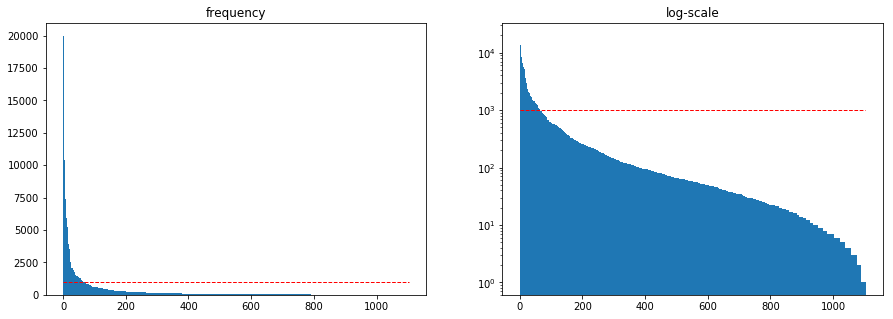

In [9]:
# plt.ylim(0,15000)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(range(1,take_num+1),freq_attr[:,1],width=1)
plt.title("frequency")
plt.hlines(1000, 0, take_num, 'red', linestyles='dashed', linewidth=1)

plt.subplot(1,2,2)
plt.bar(range(1,take_num+1),freq_attr[:,1],width=1)
plt.hlines(1000, 0, take_num, 'red', linestyles='dashed', linewidth=1)
plt.gca().set_yscale("log")
plt.title('log-scale')

plt.show()

In [23]:
freq_attr[:5]

array([[  813, 19970],
       [ 1092, 14281],
       [  147, 13522],
       [  189, 10375],
       [   13,  9151]])

In [10]:
for idx, cnt in freq_attr[:50]:
#     print(labels.loc[idx,"attribute_name"], cnt)
    print('{:<25} : {:>6}'.format(labels.loc[idx,"attribute_name"],cnt))

tag::men                  :  19970
tag::women                :  14281
culture::french           :  13522
culture::italian          :  10375
culture::american         :   9151
tag::flowers              :   8419
culture::british          :   7615
culture::japan            :   7394
tag::utilitarian objects  :   6564
culture::egyptian         :   6542
tag::portraits            :   5955
tag::trees                :   5591
culture::china            :   5382
tag::leaves               :   5259
culture::german           :   5163
culture::turkish or venice :   4416
tag::inscriptions         :   3890
tag::birds                :   3692
tag::human figures        :   3665
tag::textile fragments    :   3570
culture::islamic          :   3500
tag::mythical creatures   :   3005
tag::profiles             :   2552
tag::animals              :   2548
tag::writing systems      :   2327
tag::clothing and accessories :   2180
tag::books                :   2097
tag::landscapes           :   2075
culture::greek 

### trainデータの一部を表示

NameError: name 'tdrain_df' is not defined

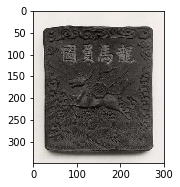

In [52]:
# Example of images with tags

i = 1
plt.figure(figsize=[50,100])
for img_name in os.listdir("../input/train/")[10:20]:   
    img = cv2.imread("../input/train/%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(30, 1, i)
    plt.imshow(img)
    ids = train_df[train_df["id"] == img_name]["attribute_ids"]
    title_val = []
    for tag_id in ids.values[0]:
        att_name = labels[labels['attribute_id'] == tag_id]['attribute_name'].values[0]
        title_val.append(att_name)
    plt.title(title_val)
    i += 1

plt.tight_layout()    
plt.show()

In [17]:
culture = [s for s in labels.attribute_name if s.startswith('c')]
tag = [s for s in labels.attribute_name if s.startswith('tag')]

In [18]:
labels

,attribute_id,attribute_name
0,0,culture::abruzzi
1,1,culture::achaemenid
2,2,culture::aegean
3,3,culture::afghan
4,4,culture::after british
5,5,culture::after german
6,6,culture::after german original
7,7,culture::after italian
8,8,culture::after russian original
9,9,culture::akkadian
